In [1]:
import numpy as np
import  cv2
import matplotlib.pyplot as plt
%matplotlib inline
#import imutils

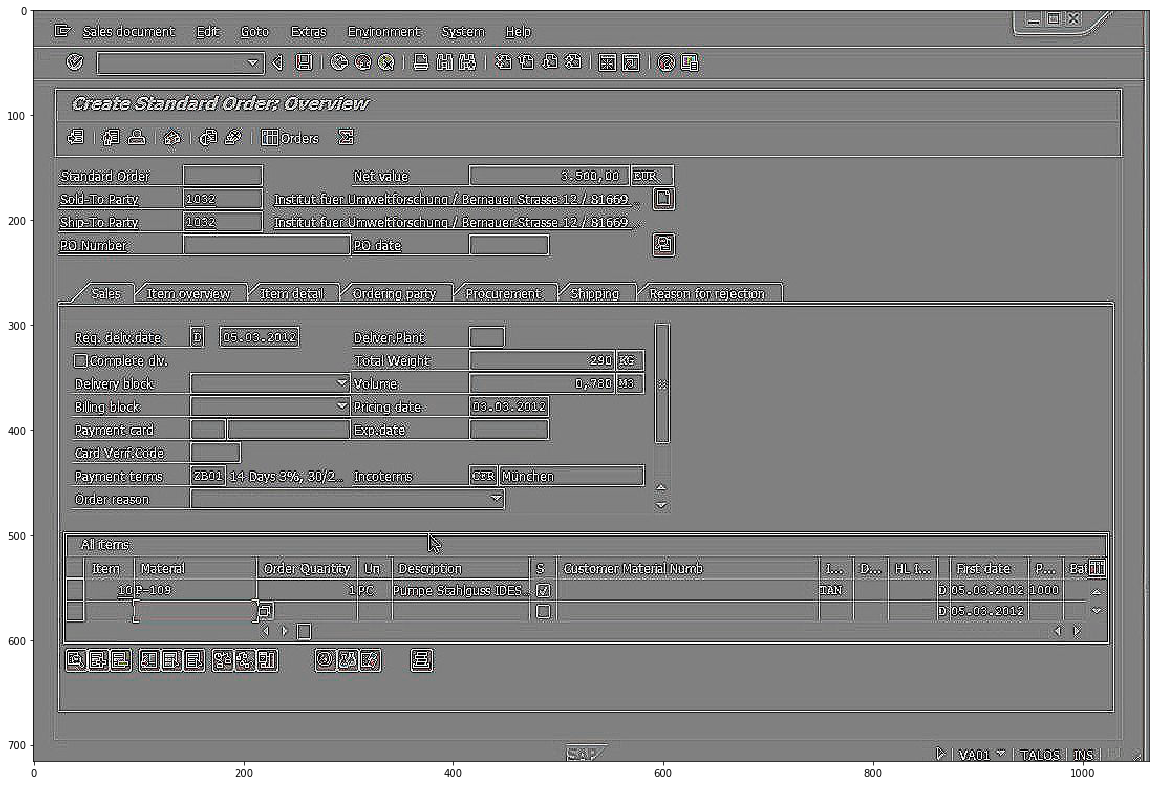

In [3]:
original_image = cv2.imread("test_result.jpg")
image = original_image.copy()
plt.figure(figsize=(20,15)) 
plt.imshow(image)

In [10]:
kernel = np.ones((5,5),np.uint8)
img1=cv2.dilate(image,kernel,iterations = 1)
cv2.imwrite("dilated_img.jpg",img1)
img1= cv2.imread('dilated_img.jpg',0)

In [11]:
cnts = cv2.findContours(img1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
def grab_contours(cnts):
    # if the length the contours tuple returned by cv2.findContours
    # is '2' then we are using either OpenCV v2.4, v4-beta, or
    # v4-official
    if len(cnts) == 2:
        cnts = cnts[0]

    # if the length of the contours tuple is '3' then we are using
    # either OpenCV v3, v4-pre, or v4-alpha
    elif len(cnts) == 3:
        cnts = cnts[1]

    # otherwise OpenCV has changed their cv2.findContours return
    # signature yet again and I have no idea WTH is going on
    else:
        raise Exception(("Contours tuple must have length 2 or 3, "
            "otherwise OpenCV changed their cv2.findContours return "
            "signature yet again. Refer to OpenCV's documentation "
            "in that case"))

    # return the actual contours array
    return cnts

In [13]:
cnts =  grab_contours(cnts)

In [19]:
checkbox_contours = []

threshold_max_area = 100
threshold_min_area = 10
contour_image = img1.copy()

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.035 * peri, True)
    (x, y, w, h) = cv2.boundingRect(approx)
    aspect_ratio = w / float(h)
    area = cv2.contourArea(c)
    print(area)
    if area < threshold_max_area and area > threshold_min_area and (aspect_ratio >= 0.9 and aspect_ratio <= 1.1):
        cv2.drawContours(original_image,[c], 0, (0,255,0), 1)
        checkbox_contours.append(c)

print('checkbox_contours', len(checkbox_contours))
cv2.imshow("checkboxes", original_image)
cv2.waitKey(0)

760045.0
checkbox_contours 0


48

In [ ]:
# handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))
